# IBM Applied Data Science Capstone Course by Coursera
### Final Report
**_Relocating to Berlin_**
- Importing liberaries
- Installing AirBnB data and pre-processing the data
- Analysing for average rent cost per day for every neighbourhood
- Analysing venues of each neighbourhood
- Clustering Neighbourhoods
- Result and discussion
***

### 1- Importing liberaries:

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('liberaries imported')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

liberaries imported


### 2- Installing AirBnB data and pre-processing the data

In [2]:
Berlin_Data = pd.read_csv("listings_summary.csv")
Berlin_Data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

In [3]:
Berlin_Data.shape

(22552, 96)

#### - Refining the data keep only the part that we need for this analysis

In [4]:
neighbourhoods = Berlin_Data[['neighbourhood','neighbourhood_group_cleansed','zipcode','price','latitude','longitude']]
neighbourhoods.head()

,neighbourhood,neighbourhood_group_cleansed,zipcode,price,latitude,longitude
0,Mitte,Mitte,10119,$60.00,52.534537,13.402557
1,NaN,Pankow,10437,$17.00,52.548513,13.404553
2,Prenzlauer Berg,Pankow,10405,$90.00,52.534996,13.417579
3,Schöneberg,Tempelhof - Schöneberg,10777,$26.00,52.498855,13.349065
4,Prenzlauer Berg,Pankow,10437,$42.00,52.543157,13.415091


In [5]:
# Renameing for convenience
neighbourhoods.rename(columns={"neighbourhood_group_cleansed":"neighbourhood group"}, inplace=True)
neighbourhoods.head()

,neighbourhood,neighbourhood group,zipcode,price,latitude,longitude
0,Mitte,Mitte,10119,$60.00,52.534537,13.402557
1,NaN,Pankow,10437,$17.00,52.548513,13.404553
2,Prenzlauer Berg,Pankow,10405,$90.00,52.534996,13.417579
3,Schöneberg,Tempelhof - Schöneberg,10777,$26.00,52.498855,13.349065
4,Prenzlauer Berg,Pankow,10437,$42.00,52.543157,13.415091


In [6]:
neighbourhoods.shape

(22552, 6)

In [7]:
neighbourhoods.isnull().values.any()

True

#### - removing the rows with empty cells is important as they might effect the final result

In [8]:
neighbourhoods.dropna(axis = 0, how='any', inplace=True)
neighbourhoods.shape

(20791, 6)

### 3- Analysing for average rent cost per day for every neighbourhood

In [9]:
print('The dataframe has {} neighbourhood groups and {} neighbourhoods'.format(len(neighbourhoods['neighbourhood group'].unique()),len(neighbourhoods['neighbourhood'].unique())))

The dataframe has 12 neighbourhood groups and 91 neighbourhoods


#### - converting price column from string to numeric values

In [10]:
neighbourhoods['price'] = neighbourhoods['price'].str.replace('$', '')
neighbourhoods['price'] = neighbourhoods['price'].str.replace(',', '').astype(float)

In [11]:
prices = neighbourhoods.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(by=['price'])

In [12]:
prices

,neighbourhood,price
47,Lübars,25.000000
24,Gropiusstadt,30.333333
86,Wilhelmsruh,33.166667
56,Neu-Hohenschönhausen,33.428571
26,Grünau,33.909091
33,Hellersdorf,34.157895
43,Lankwitz,35.333333
67,Reinickendorf,38.611940
74,Siemensstadt,39.125000
4,Baumschulenweg,39.974026


In [13]:
prices['price'].describe()

count     91.000000
mean      60.910524
std       26.030741
min       25.000000
25%       47.015000
50%       54.625000
75%       65.818598
max      208.625793
Name: price, dtype: float64

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = prices.hist(column='price', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("rent cost ($/day)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequancy", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

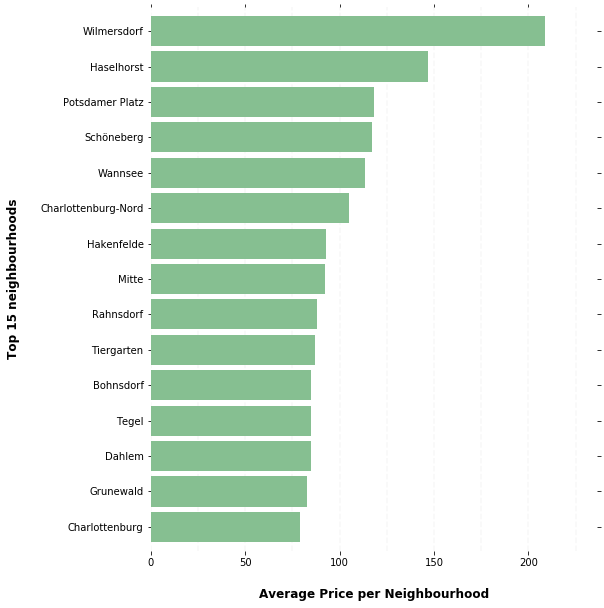

In [15]:
x = prices.groupby('neighbourhood')['price'].mean().sort_values().tail(15)
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Average Price per Neighbourhood", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Top 15 neighbourhoods", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

### - Summery for rent cost analysis:
1- cost ($/day) distribution is right skewed, with:
* mean:      60.9
* std :      26.0
* min :      25.0
* max :      208.6

2- *Lübars* is the least expensive neighbourhood and *Wilmersdorf* is the most expensive one.




.

### 4- Analysing venues of each neighbourhood:

#### - finding the center point of each neighbourhood

In [16]:
locations = neighbourhoods.groupby(['neighbourhood','neighbourhood group'], as_index=False, sort=False)['latitude','longitude'].mean()
locations

,neighbourhood,neighbourhood group,latitude,longitude
0,Mitte,Mitte,52.525761,13.400066
1,Prenzlauer Berg,Pankow,52.541180,13.420390
2,Schöneberg,Tempelhof - Schöneberg,52.489477,13.353267
3,Friedrichshain,Friedrichshain-Kreuzberg,52.513399,13.456791
4,Kreuzberg,Friedrichshain-Kreuzberg,52.495791,13.412810
5,Neukölln,Neukölln,52.479077,13.435073
6,Moabit,Mitte,52.528535,13.340972
7,Charlottenburg,Charlottenburg-Wilm.,52.511172,13.306907
8,Alt-Treptow,Treptow - Köpenick,52.490525,13.449651
9,Lichterfelde,Steglitz - Zehlendorf,52.435379,13.309370


#### - using geocoder to find coordinates of Berlin

In [17]:
address = 'Berlin'
geolocator = Nominatim(user_agent="Bn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('the geographical coordinates of Berlin city are {}, {}.'.format(latitude,longitude))

the geographical coordinates of Berlin city are 52.5170365, 13.3888599.


#### - Using Folium to create map of Berlin and all neighbourhoods 

In [18]:
map_berlin = folium.Map(location=[latitude,longitude], zoom_start=10)

# create markers
for lat, lng, neighbourhoodgroup, neighbourhood in zip(locations['latitude'], locations['longitude'], locations['neighbourhood group'], locations['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, neighbourhoodgroup)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

#### - setting up credentials for using Foursquare API
*Note: will be deleted before uploading to github*

#### - function for sending GET request for Foursquere API

In [20]:
LIMIT = 100 
radius = 500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
Berlin_venues = getNearbyVenues(names=locations['neighbourhood'],
                                   latitudes=locations['latitude'],
                                   longitudes=locations['longitude']
                                  )

Mitte
Prenzlauer Berg
Schöneberg
Friedrichshain
Kreuzberg
Neukölln
Moabit
Charlottenburg
Alt-Treptow
Lichterfelde
Schmöckwitz
Neukölln
Schmargendorf
Niederschönhausen
Friedrichshagen
Wilmersdorf
Heinersdorf
Rummelsburg
Friedenau
Wedding
Reinickendorf
Pankow
Tegel
Buckow
Karlshorst
Lichtenberg
Zehlendorf
Tiergarten
Rudow
Altglienicke
Hansaviertel
Lichtenrade
Westend
Mahlsdorf
Potsdamer Platz
Biesdorf
Wannsee
Johannisthal
Konradshöhe
Marienfelde
Wilhelmstadt
Schöneberg
Baumschulenweg
Halensee
Steglitz
Frohnau
Nikolassee
Karow
Wittenau
Tempelhof
Rahnsdorf
Kladow
Lankwitz
Alt-Hohenschönhausen
Weißensee
Rosenthal
Gropiusstadt
Britz
Kaulsdorf
Hellersdorf
Marzahn
Märkisches Viertel
Dahlem
Adlershof
Wilhelmsruh
Plänterwald
Französisch Buchholz
Grunewald
Fennpfuhl
Köpenick
Mariendorf
Friedrichsfelde
Bohnsdorf
Hermsdorf
Siemensstadt
Müggelheim
Charlottenburg-Nord
Oberschöneweide
Buch
Niederschöneweide
Potsdamer Platz
Spandau
Gatow
Neu-Hohenschönhausen
Mitte
Grünau
Falkenhagener Feld
Hakenfelde
W

In [22]:
print(Berlin_venues.shape)
Berlin_venues.head()

(1934, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.525761,13.400066,BEN RAHIM,52.525168,13.401928,Coffee Shop
1,Mitte,52.525761,13.400066,Neurotitan,52.524488,13.401809,Art Gallery
2,Mitte,52.525761,13.400066,Sophiensaele,52.526031,13.401385,Dance Studio
3,Mitte,52.525761,13.400066,Billardsalon Köh,52.525294,13.401938,Pool Hall
4,Mitte,52.525761,13.400066,Cocolo Ramen,52.527237,13.399299,Ramen Restaurant


#### - processing data to find number of venues grouped by category for each neighbourhood

In [23]:
Berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,6,6,6,6,6,6
Alt-Hohenschönhausen,20,20,20,20,20,20
Alt-Treptow,20,20,20,20,20,20
Altglienicke,3,3,3,3,3,3
Baumschulenweg,23,23,23,23,23,23
Biesdorf,6,6,6,6,6,6
Blankenburg,4,4,4,4,4,4
Bohnsdorf,3,3,3,3,3,3
Britz,8,8,8,8,8,8


In [24]:
print('There are {} uniques categories.'.format(len(Berlin_venues['Venue Category'].unique())),len(Berlin_venues['Neighborhood'].unique()))

There are 276 uniques categories. 90


In [25]:
# one hot encoding
Berlin_onehot = pd.get_dummies(Berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Berlin_onehot['Neighborhood'] = Berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Berlin_onehot.columns[-1]] + list(Berlin_onehot.columns[:-1])
Berlin_onehot = Berlin_onehot[fixed_columns]

Berlin_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Camera Store,Campground,Canal,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Franconian Restaurant,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Lawyer,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Supply Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo Exhibit
0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
Berlin_onehot.shape

(1934, 277)

In [27]:
Berlin_grouped = Berlin_onehot.groupby('Neighborhood').mean().reset_index()
Berlin_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Camera Store,Campground,Canal,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Franconian Restaurant,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Lawyer,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Supply Store,Paintball Field,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo Exhibit
0,Adlershof,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [32]:
Berlin_grouped.shape

(90, 277)

#### -finding most common venues for each neighbourhood

In [29]:
num_top_venues = 5

for hood in Berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Berlin_grouped[Berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adlershof----
                venue  freq
0    Greek Restaurant  0.17
1  Light Rail Station  0.17
2                Bank  0.17
3   Trattoria/Osteria  0.17
4  Italian Restaurant  0.17


----Alt-Hohenschönhausen----
          venue  freq
0   Supermarket  0.15
1  Tram Station  0.10
2        Bakery  0.10
3          Café  0.10
4    Steakhouse  0.05


----Alt-Treptow----
                           venue  freq
0                           Café  0.20
1  Vegetarian / Vegan Restaurant  0.10
2              Indian Restaurant  0.05
3              German Restaurant  0.05
4                    Snack Place  0.05


----Altglienicke----
         venue  freq
0  Supermarket  0.33
1       Circus  0.33
2  Pizza Place  0.33
3          ATM  0.00
4  Opera House  0.00


----Baumschulenweg----
         venue  freq
0     Bus Stop  0.13
1       Bakery  0.13
2         Café  0.09
3  Supermarket  0.09
4    Drugstore  0.09


----Biesdorf----
                 venue  freq
0               Palace  0.17
1               Ba

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Berlin_grouped['Neighborhood']

for ind in np.arange(Berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Greek Restaurant,Italian Restaurant,Bank,Trattoria/Osteria,Supermarket,Light Rail Station,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant
1,Alt-Hohenschönhausen,Supermarket,Café,Bakery,Tram Station,Food Service,Liquor Store,Bank,Drugstore,Steakhouse,Bus Stop
2,Alt-Treptow,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery,Indian Restaurant,Italian Restaurant,German Restaurant,Music Venue,Organic Grocery,Drugstore
3,Altglienicke,Pizza Place,Supermarket,Circus,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
4,Baumschulenweg,Bus Stop,Bakery,Drugstore,Café,Supermarket,Ice Cream Shop,Italian Restaurant,Chinese Restaurant,Shipping Store,Smoke Shop


### 5- Clustering Neighbourhoods:

#### - using KMean method and setting k= 4

In [34]:
# set number of clusters
kclusters = 4

Berlin_grouped_clustering = Berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Berlin_grouped_clustering
)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:12] 

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0])

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Berlin_merged = locations

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Berlin_merged = Berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighbourhood')

Berlin_merged.head() # check the last columns!

,neighbourhood,neighbourhood group,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,Mitte,52.525761,13.400066,0.0,Hotel,Coffee Shop,Clothing Store,Nightclub,Café,Italian Restaurant,Art Gallery,Park,Supermarket,Indie Movie Theater
1,Prenzlauer Berg,Pankow,52.541180,13.420390,0.0,Café,Bar,Japanese Restaurant,Vietnamese Restaurant,Beer Bar,Falafel Restaurant,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Trattoria/Osteria
2,Schöneberg,Tempelhof - Schöneberg,52.489477,13.353267,0.0,Hotel,Café,Zoo Exhibit,Cocktail Bar,Ice Cream Shop,German Restaurant,Coffee Shop,Vietnamese Restaurant,Italian Restaurant,Wine Bar
3,Friedrichshain,Friedrichshain-Kreuzberg,52.513399,13.456791,0.0,Café,Pizza Place,Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Falafel Restaurant,Thai Restaurant,German Restaurant,Middle Eastern Restaurant
4,Kreuzberg,Friedrichshain-Kreuzberg,52.495791,13.412810,0.0,Bakery,Coffee Shop,Bar,Turkish Restaurant,Pizza Place,Waterfront,Russian Restaurant,German Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant


In [38]:
Berlin_merged.dropna(axis = 0, how='any', inplace=True)

In [40]:
Berlin_merged

,neighbourhood,neighbourhood group,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,Mitte,52.525761,13.400066,0.0,Hotel,Coffee Shop,Clothing Store,Nightclub,Café,Italian Restaurant,Art Gallery,Park,Supermarket,Indie Movie Theater
1,Prenzlauer Berg,Pankow,52.541180,13.420390,0.0,Café,Bar,Japanese Restaurant,Vietnamese Restaurant,Beer Bar,Falafel Restaurant,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Trattoria/Osteria
2,Schöneberg,Tempelhof - Schöneberg,52.489477,13.353267,0.0,Hotel,Café,Zoo Exhibit,Cocktail Bar,Ice Cream Shop,German Restaurant,Coffee Shop,Vietnamese Restaurant,Italian Restaurant,Wine Bar
3,Friedrichshain,Friedrichshain-Kreuzberg,52.513399,13.456791,0.0,Café,Pizza Place,Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Falafel Restaurant,Thai Restaurant,German Restaurant,Middle Eastern Restaurant
4,Kreuzberg,Friedrichshain-Kreuzberg,52.495791,13.412810,0.0,Bakery,Coffee Shop,Bar,Turkish Restaurant,Pizza Place,Waterfront,Russian Restaurant,German Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant
5,Neukölln,Neukölln,52.479077,13.435073,0.0,Bar,Café,Coffee Shop,Pizza Place,Supermarket,Italian Restaurant,Bakery,Middle Eastern Restaurant,Cocktail Bar,Pub
6,Moabit,Mitte,52.528535,13.340972,0.0,Doner Restaurant,Burger Joint,Gym / Fitness Center,Café,Bakery,Hotel,Grocery Store,German Restaurant,Park,Pizza Place
7,Charlottenburg,Charlottenburg-Wilm.,52.511172,13.306907,0.0,Café,Italian Restaurant,Supermarket,Drugstore,Sushi Restaurant,Burger Joint,Hotel,Bakery,German Restaurant,Thai Restaurant
8,Alt-Treptow,Treptow - Köpenick,52.490525,13.449651,0.0,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery,Indian Restaurant,Italian Restaurant,German Restaurant,Music Venue,Organic Grocery,Drugstore
9,Lichterfelde,Steglitz - Zehlendorf,52.435379,13.309370,0.0,Bakery,Bus Stop,Pool,Bank,Liquor Store,Eastern European Restaurant,IT Services,Hostel,Plaza,Hotel


#### - Showing the Map after labeling the Clusters

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Berlin_merged['latitude'], Berlin_merged['longitude'], Berlin_merged['neighbourhood'], Berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### - investigating Clusters

In [43]:
# Cluster 1
Berlin_merged.loc[Berlin_merged['Cluster Labels'] == 0, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,neighbourhood group,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,Hotel,Coffee Shop,Clothing Store,Nightclub,Café,Italian Restaurant,Art Gallery,Park,Supermarket,Indie Movie Theater
1,Pankow,Café,Bar,Japanese Restaurant,Vietnamese Restaurant,Beer Bar,Falafel Restaurant,Italian Restaurant,Cocktail Bar,Ice Cream Shop,Trattoria/Osteria
2,Tempelhof - Schöneberg,Hotel,Café,Zoo Exhibit,Cocktail Bar,Ice Cream Shop,German Restaurant,Coffee Shop,Vietnamese Restaurant,Italian Restaurant,Wine Bar
3,Friedrichshain-Kreuzberg,Café,Pizza Place,Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Falafel Restaurant,Thai Restaurant,German Restaurant,Middle Eastern Restaurant
4,Friedrichshain-Kreuzberg,Bakery,Coffee Shop,Bar,Turkish Restaurant,Pizza Place,Waterfront,Russian Restaurant,German Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant
5,Neukölln,Bar,Café,Coffee Shop,Pizza Place,Supermarket,Italian Restaurant,Bakery,Middle Eastern Restaurant,Cocktail Bar,Pub
6,Mitte,Doner Restaurant,Burger Joint,Gym / Fitness Center,Café,Bakery,Hotel,Grocery Store,German Restaurant,Park,Pizza Place
7,Charlottenburg-Wilm.,Café,Italian Restaurant,Supermarket,Drugstore,Sushi Restaurant,Burger Joint,Hotel,Bakery,German Restaurant,Thai Restaurant
8,Treptow - Köpenick,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery,Indian Restaurant,Italian Restaurant,German Restaurant,Music Venue,Organic Grocery,Drugstore
9,Steglitz - Zehlendorf,Bakery,Bus Stop,Pool,Bank,Liquor Store,Eastern European Restaurant,IT Services,Hostel,Plaza,Hotel


#### 1st Cluster:
- 65 neighbourhoods
- Showing (Bars, Café, night clubs, all types of restaurants).
- I'll label it : Hangout cluster

In [44]:
# Cluster 2
Berlin_merged.loc[Berlin_merged['Cluster Labels'] == 1, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,neighbourhood group,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Spandau,Home Service,Zoo Exhibit,Farm,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market


#### 2nd Cluster:
- 1 neighbourhood
- Showing(farm, zoo exhibit, home service, electronics store)
- I'll label it : family cluster

In [45]:
# Cluster 3
Berlin_merged.loc[Berlin_merged['Cluster Labels'] == 2, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,neighbourhood group,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Pankow,Tram Station,Supermarket,Discount Store,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
20,Reinickendorf,Bus Stop,Supermarket,Dry Cleaner,Gastropub,Italian Restaurant,Soccer Field,Farmers Market,Farm,Fast Food Restaurant,Dumpling Restaurant
23,Neukölln,Restaurant,Supermarket,German Restaurant,Insurance Office,Bus Stop,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
29,Treptow - Köpenick,Pizza Place,Supermarket,Circus,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
38,Reinickendorf,Supermarket,Bus Stop,Restaurant,Zoo Exhibit,Farm,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
39,Tempelhof - Schöneberg,Supermarket,Plaza,Tennis Court,History Museum,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space
40,Spandau,Supermarket,Bus Stop,Park,Fried Chicken Joint,Halal Restaurant,Zoo Exhibit,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space
48,Reinickendorf,German Restaurant,Supermarket,Pet Store,Electronics Store,Concert Hall,Farm,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
55,Pankow,Greek Restaurant,Italian Restaurant,Shopping Mall,Supermarket,Bus Stop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space
57,Neukölln,Supermarket,Italian Restaurant,Restaurant,Gym / Fitness Center,Bus Stop,Drugstore,Farmers Market,Farm,Fast Food Restaurant,Fish Market


#### 3rd Cluster:
- 22 neighbourhoods
- Showing (supermarket, plaza, shopping stores, home store, circus)
- I'll label it : shopping cluster

In [46]:
# Cluster 4
Berlin_merged.loc[Berlin_merged['Cluster Labels'] == 3, Berlin_merged.columns[[1] + list(range(5, Berlin_merged.shape[1]))]]

,neighbourhood group,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
95,Lichtenberg,Gas Station,Farmers Market,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Zoo Exhibit,Dumpling Restaurant


#### 4th Cluster:
- 1 neighbourhood
- Showing (gas station, farmers market, electronic store, foreign restaurants )
- I'll label it : foreign cluster

### 6- Result and discussion:
* Berlin city is showing high quality of living as most of neighbourhoods are categorised between Hangout and shopping clusters.

 * The 1st cluster (Hangout cluster) is the major cluster as it contains 73% of neighbourhoods.
 
 * For me as I love hangging out, the 1st cluster is the best choice.

 * Luckly the least expensive neighbourhoods happend to be also in the 1st cluster.
Thus, *Lübars * is the choice. 